In [75]:
import pandas as pd
import numpy as np

df=pd.read_csv("/content/drive/MyDrive/Csv_Data/googleplaystore.csv")
df_clean=df.dropna()
# df.head()
df.shape

(10841, 13)

In [76]:
df.nunique()

App               9660
Category            34
Rating              40
Reviews           6002
Size               462
Installs            22
Type                 3
Price               93
Content Rating       6
Genres             120
Last Updated      1378
Current Ver       2832
Android Ver         33
dtype: int64

# Correct the number format of Installs column (10,000+ to 10000)

In [77]:
def convert_number_with_plus_sign(x):
    if isinstance(x, str) and '+' in x:
        return float(x.replace(',', '').replace('+', ''))
    else:
        return x
df_clean['Installs'] = df_clean['Installs'].apply(convert_number_with_plus_sign)

#convert number of installs into numeric
df['Installs'] = df['Installs'].apply(convert_number_with_plus_sign)
df['Installs'] = df['Installs'].replace({'\D+': 0}, regex=True)
df['Installs'] = pd.to_numeric(df['Installs'])



<ipython-input-77-f93fcf6215ab>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Installs'] = df_clean['Installs'].apply(convert_number_with_plus_sign)


In [78]:
df_clean_upper=df_clean
df_clean_lower=df_clean
df_clean.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000.0,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000.0,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000.0,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000.0,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000.0,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


# Visualise the null values

In [79]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

# METHODOLOGY: Apply linear regression to fill in missing ratings

*   Ratings and installs can be related

*   set threshold as 10,000 installs.
*   do linear regression twice, once for 10,000+ installs and then for < 10,000 installs to fill ratings



# Partition data

In [80]:
df_clean_upper['Installs'] = pd.to_numeric(df_clean_upper['Installs'])
df_clean_upper = df_clean_upper[df_clean_upper['Installs'] >= 10000]
print(df_clean_upper['Installs'])

0           10000.0
1          500000.0
2         5000000.0
3        50000000.0
4          100000.0
            ...    
10828       10000.0
10829       10000.0
10830      100000.0
10832      100000.0
10840    10000000.0
Name: Installs, Length: 7570, dtype: float64


<ipython-input-80-7c45e237912d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean_upper['Installs'] = pd.to_numeric(df_clean_upper['Installs'])


In [81]:
df_clean_lower['Installs'] = pd.to_numeric(df_clean['Installs'])
df_clean_lower = df_clean_lower[df_clean_lower['Installs'] <= 10000]
df_clean_lower = df_clean_lower[df_clean_lower['Installs'] >= 1000]
print(df_clean_lower['Installs'])

0        10000.0
9        10000.0
17       10000.0
25       10000.0
28       10000.0
          ...   
10828    10000.0
10829    10000.0
10833     1000.0
10836     5000.0
10839     1000.0
Name: Installs, Length: 2152, dtype: float64


<ipython-input-81-4c4a327527f8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean_lower['Installs'] = pd.to_numeric(df_clean['Installs'])


# Apply linear regression x2

In [82]:
from sklearn.linear_model import LinearRegression


upper_model = LinearRegression()

# Fit the model to the data
upper_model.fit(df_clean_upper[['Installs']], df_clean_upper['Rating'])

# Print the slope and intercept of the regression line
print('Slope:', upper_model.coef_[0])
print('Intercept:', upper_model.intercept_)

# Use the model to predict the value of yvar for a given xvar
xvar_pred = 5000000
yvar_pred = upper_model.predict([[xvar_pred]])
print('Predicted value of yvar for xvar =', xvar_pred, 'is:', yvar_pred[0])

Slope: 2.7476089459064977e-10
Intercept: 4.193929165758221
Predicted value of yvar for xvar = 5000000 is: 4.195302970231174


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [83]:
from sklearn.linear_model import LinearRegression


lower_model = LinearRegression()

# Fit the model to the data
lower_model.fit(df_clean_lower[['Installs']], df_clean_lower['Rating'])

# Print the slope and intercept of the regression line
print('Slope:', lower_model.coef_[0])
print('Intercept:', lower_model.intercept_)

# Use the model to predict the value of yvar for a given xvar
xvar_pred = 1000
yvar_pred = lower_model.predict([[xvar_pred]])
print('Predicted value of yvar for xvar =', xvar_pred, 'is:', yvar_pred[0])

Slope: -2.648899817805091e-06
Intercept: 4.061580759730159
Predicted value of yvar for xvar = 1000 is: 4.058931859912354


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# Fill missing values

In [84]:
for col in ["Rating"]:
    null_values = df[col].isnull()


In [85]:
df.loc[null_values, 'Rating'] = np.select(
    [df.loc[null_values, 'Installs'] > 10000, df.loc[null_values, 'Installs'] <= 10000],
    [upper_model.predict(df.loc[null_values, 'Installs'].values.reshape(-1, 1)),
     lower_model.predict(df.loc[null_values, 'Installs'].values.reshape(-1, 1))],
    default=np.nan
)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [86]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    1
Genres            0
Last Updated      0
Current Ver       8
Android Ver       3
dtype: int64

In [87]:
df.dropna(inplace=True)

In [88]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [89]:
# as type and price serve the same function.
df=df.drop(["Price"],axis=1)



In [90]:
df=df.drop(["Current Ver", "Last Updated"],axis=1)

In [91]:
df['Content Rating'].nunique()

6

In [92]:
#very biased results, so drop this column too
df['Content Rating'].value_counts()
df=df.drop(['Content Rating'],axis=1)

# Store only the numeric portion of andriod version

In [93]:
df_copy=df
# df['column_name'] = df['column_name'].str.replace(r'(\d+\.\d+\.\d+) and up', r'\1')
df_copy['Android Ver'] = df_copy['Android Ver'].astype(str)
df_copy['Android Ver'] = df_copy['Android Ver'].apply(lambda x: x[:3])

In [94]:
df_copy['Android Ver']

0        4.0
1        4.0
2        4.0
3        4.2
4        4.4
        ... 
10836    4.1
10837    4.1
10838    2.2
10839    Var
10840    Var
Name: Android Ver, Length: 10829, dtype: object

In [95]:
# replace the non - int with numerical value
df['Android Ver'] = df['Android Ver'].replace('Var', 4.4)
# convert the column to numerical
df_copy['Android Ver'] = df_copy['Android Ver'].astype(float)


In [96]:
df_copy['Android Ver']

0        4.0
1        4.0
2        4.0
3        4.2
4        4.4
        ... 
10836    4.1
10837    4.1
10838    2.2
10839    4.4
10840    4.4
Name: Android Ver, Length: 10829, dtype: float64

In [97]:
df=df_copy

In [98]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Genres,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000.0,Free,Art & Design,4.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000.0,Free,Art & Design;Pretend Play,4.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000.0,Free,Art & Design,4.0
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000.0,Free,Art & Design,4.2
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000.0,Free,Art & Design;Creativity,4.4


# Convert other numeric string values to numeric

In [99]:
string_cols = df.select_dtypes(include=['object']).columns
for col in string_cols:
  print(df[col])

  # reviews and size are numeric strings

0           Photo Editor & Candy Camera & Grid & ScrapBook
1                                      Coloring book moana
2        U Launcher Lite – FREE Live Cool Themes, Hide ...
3                                    Sketch - Draw & Paint
4                    Pixel Draw - Number Art Coloring Book
                               ...                        
10836                                     Sya9a Maroc - FR
10837                     Fr. Mike Schmitz Audio Teachings
10838                               Parkinson Exercices FR
10839                        The SCP Foundation DB fr nn5n
10840        iHoroscope - 2018 Daily Horoscope & Astrology
Name: App, Length: 10829, dtype: object
0             ART_AND_DESIGN
1             ART_AND_DESIGN
2             ART_AND_DESIGN
3             ART_AND_DESIGN
4             ART_AND_DESIGN
                ...         
10836                 FAMILY
10837                 FAMILY
10838                MEDICAL
10839    BOOKS_AND_REFERENCE
10840              LI

In [110]:
df['Reviews']=pd.to_numeric(df['Reviews'])

# drop the rows which have non numerical size
df = df.drop(df.loc[df['Size'] == 'Varies with device'].index)

# convert the size from '3.5m to 3.5'
df['Size'] = df['Size'].str.replace('M', '000000')
df['Size'] = df['Size'].str.replace('k', '000')
df['Size'] = df['Size'].str.replace('.', '')

df['Size']=pd.to_numeric(df['Size'])


In [111]:
for col in string_cols:
  print(df[col])

0           Photo Editor & Candy Camera & Grid & ScrapBook
1                                      Coloring book moana
2        U Launcher Lite – FREE Live Cool Themes, Hide ...
3                                    Sketch - Draw & Paint
4                    Pixel Draw - Number Art Coloring Book
                               ...                        
10835                                             FR Forms
10836                                     Sya9a Maroc - FR
10837                     Fr. Mike Schmitz Audio Teachings
10838                               Parkinson Exercices FR
10840        iHoroscope - 2018 Daily Horoscope & Astrology
Name: App, Length: 9135, dtype: object
0        ART_AND_DESIGN
1        ART_AND_DESIGN
2        ART_AND_DESIGN
3        ART_AND_DESIGN
4        ART_AND_DESIGN
              ...      
10835          BUSINESS
10836            FAMILY
10837            FAMILY
10838           MEDICAL
10840         LIFESTYLE
Name: Category, Length: 9135, dtype: object
0   

# Relationship analysis

<Axes: >

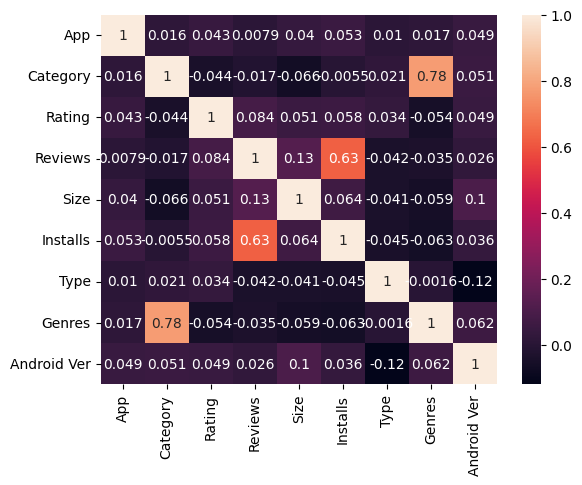

In [113]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

string_cols = df.select_dtypes(include=['object']).columns

# create temporary df with encoded columns
df_corr=df

# Convert string columns into numerical columns using LabelEncoder
le = LabelEncoder()
for col in string_cols:
    df_corr[col] = le.fit_transform(df_corr[col])


corelation=df_corr.corr()
sns.heatmap(corelation, xticklabels=corelation.columns, yticklabels=corelation.columns, annot=True)


#Genre and Category have high correlation so drop one.

In [117]:
df_corr=df.drop(['Genres'],axis=1)

In [123]:
df_corr.head()
# drop category, app and type as they are not meaningful in correlation
df_corr=df_corr.drop(['Category','Type','App'], axis=1)


In [124]:
df_corr.head()

,Rating,Reviews,Size,Installs,Android Ver
0,4.1,159,19000000,10000.0,4.0
1,3.9,967,14000000,500000.0,4.0
2,4.7,87510,87000000,5000000.0,4.0
3,4.5,215644,25000000,50000000.0,4.2
4,4.3,967,28000000,100000.0,4.4


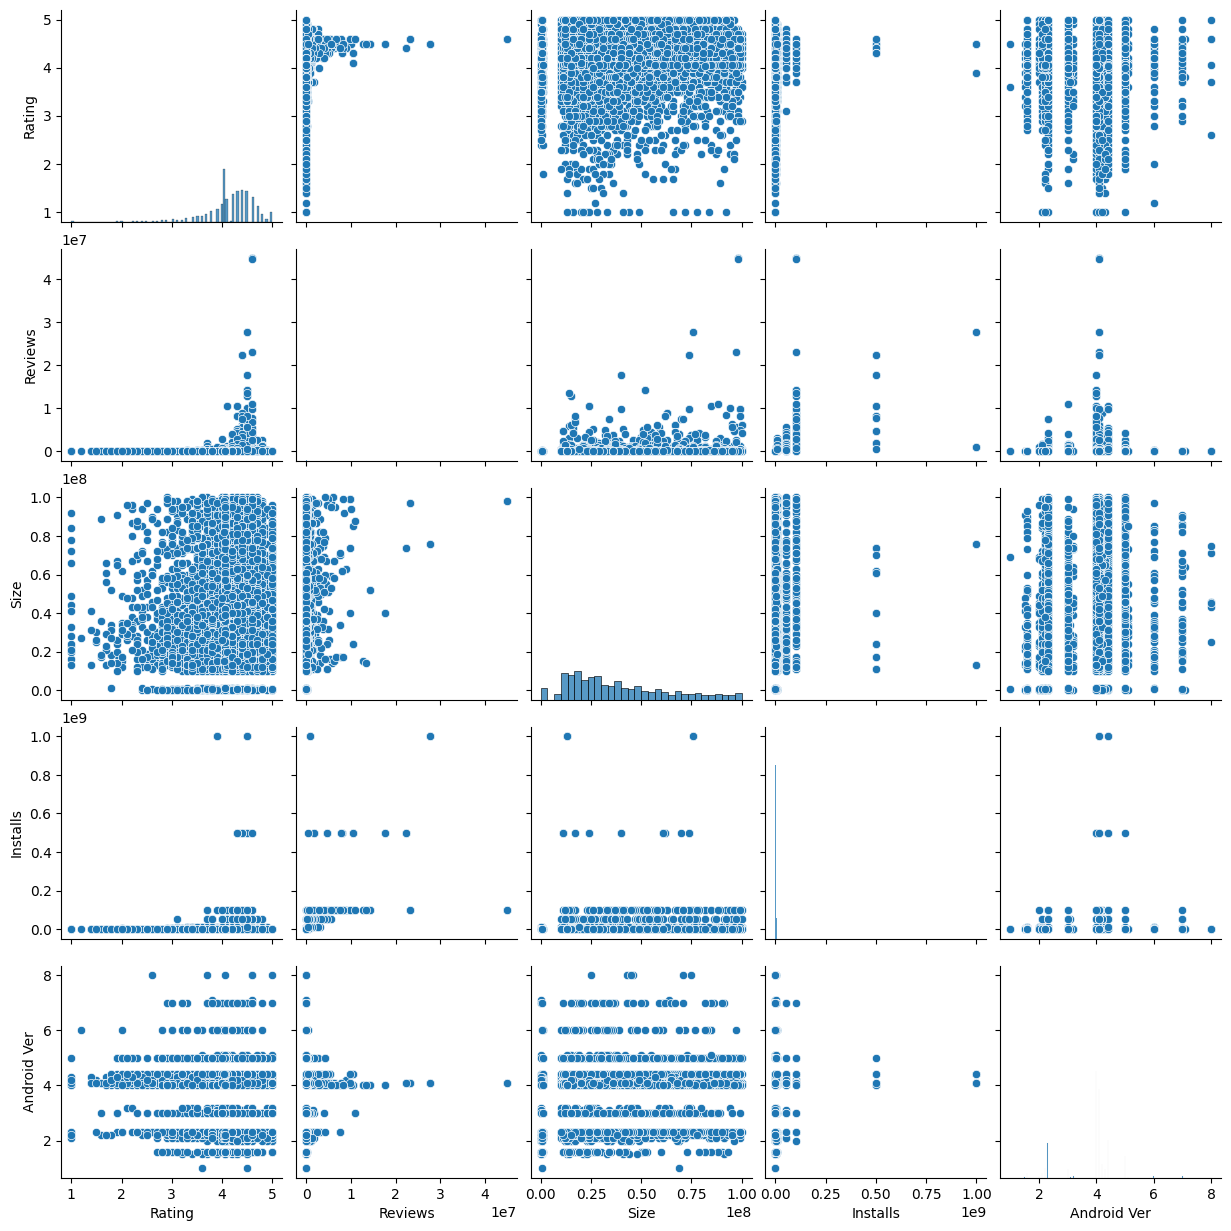

In [125]:
sns.pairplot(df_corr)

In [126]:
df_corr.head()

,Rating,Reviews,Size,Installs,Android Ver
0,4.1,159,19000000,10000.0,4.0
1,3.9,967,14000000,500000.0,4.0
2,4.7,87510,87000000,5000000.0,4.0
3,4.5,215644,25000000,50000000.0,4.2
4,4.3,967,28000000,100000.0,4.4


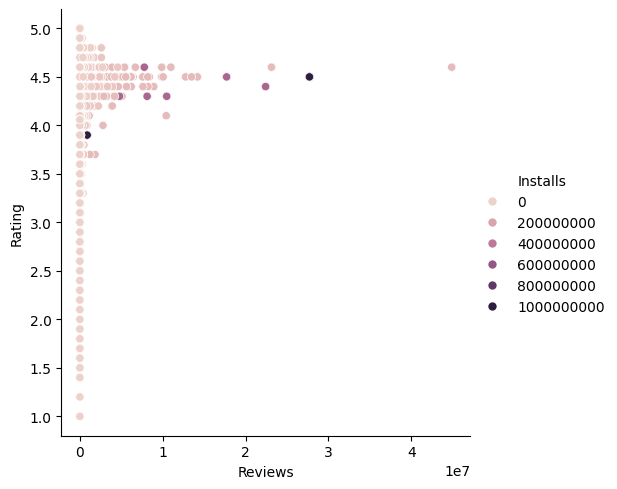

In [128]:
# analyze relationship between rating reviews and installs

sns.relplot(x='Reviews',y='Rating',hue='Installs',data=df_corr)

# Improved relation plot

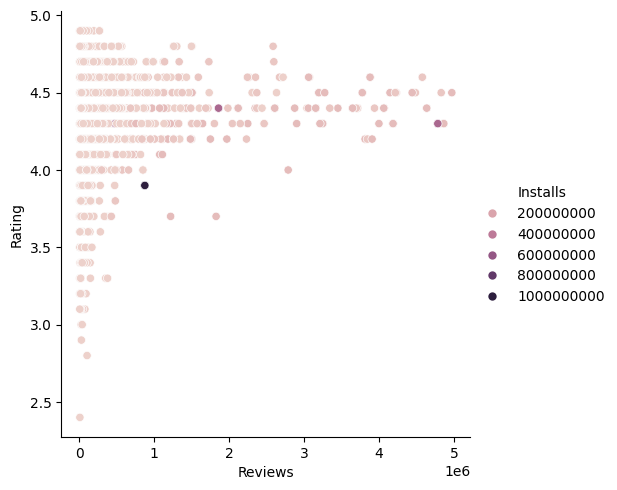

In [134]:
# drop rows where 'reviews' is between 1000 and 5000000
df_corr = df_corr[df_corr['Reviews'] >= 10000]
df_corr = df_corr[df_corr['Reviews'] <= 5000000]

sns.relplot(x='Reviews',y='Rating',hue='Installs',data=df_corr)

# analyze dispersion of all three variables and remove outliers

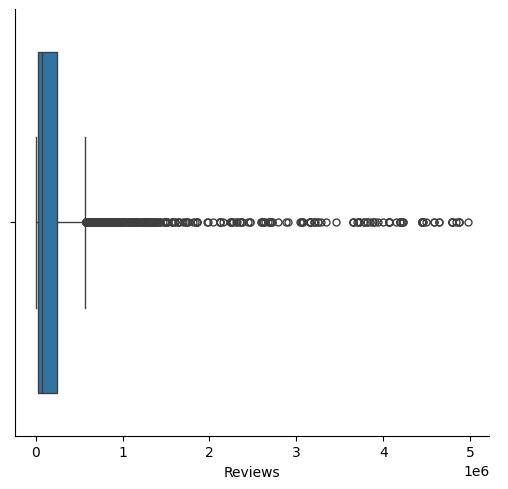

In [135]:
sns.catplot(x='Reviews',kind='box',data=df_corr)

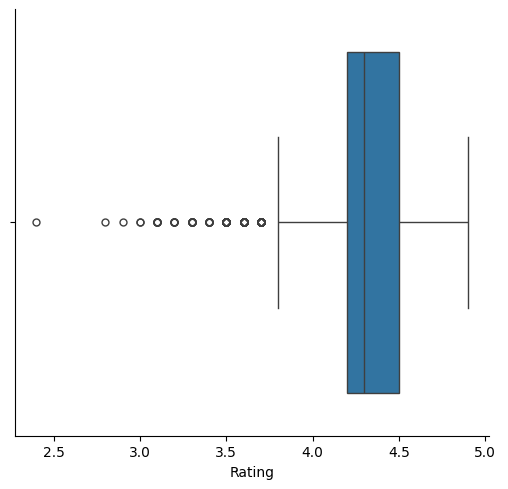

In [136]:
sns.catplot(x='Rating',kind='box',data=df_corr)

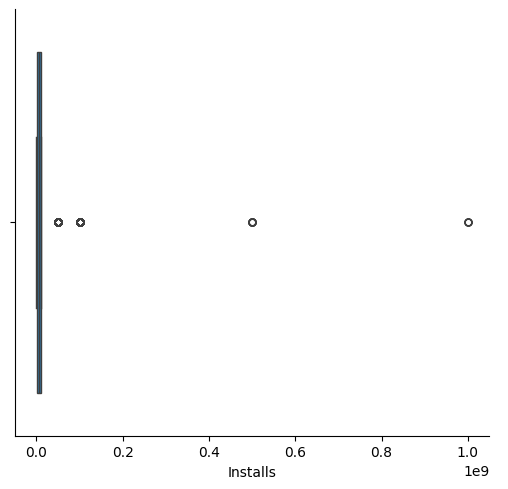

In [137]:
sns.catplot(x='Installs',kind='box',data=df_corr)

50000.0
50000000.0


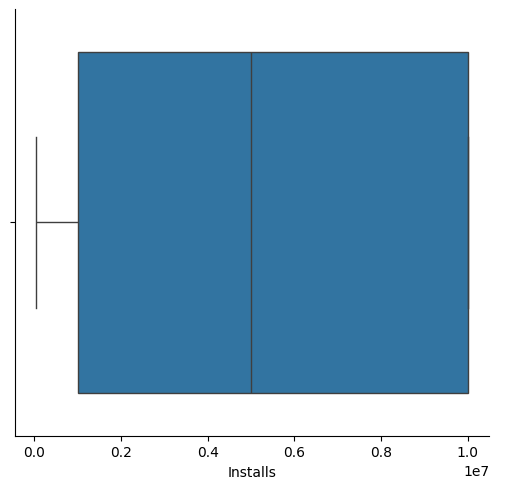

In [144]:
print(df_corr['Installs'].min())
print(df_corr['Installs'].max())

# after dropping outliers
df_corr = df_corr[df_corr['Installs'] >= 10000]
df_corr = df_corr[df_corr['Installs'] <50000000]

sns.catplot(x='Installs',kind='box',data=df_corr)


# relation plot

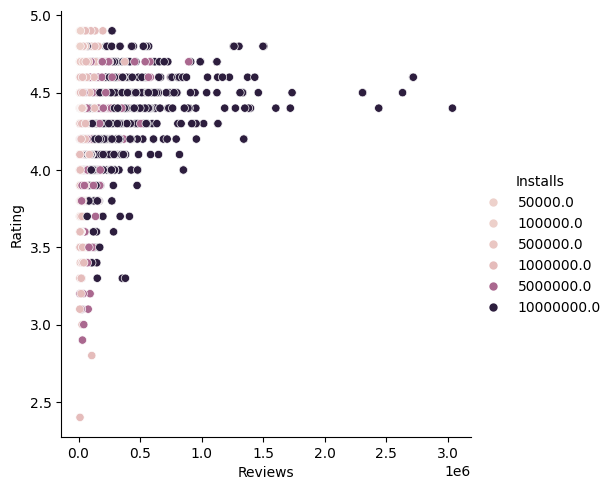

In [145]:
sns.relplot(x='Reviews',y='Rating',hue='Installs',data=df_corr)